In [711]:
import os
os.chdir("/Users/sanjanakotha/Desktop/Staller_Lab/consensus_predictor/notebooks")


In [712]:
import pandas as pd
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import numpy as np

Plan: Read in multiple datasets, then compare scores using Z-scores.

1. 40 mers
- PADI
- GCN4
- SOG1
- Synthetics
- Controls
2. 53 mers
- Sanborn
- Hummel 
- Lucas


# 1. 40-mers

## 1A. PADI

In [713]:
padi = pd.read_excel("../data/41586_2024_7707_MOESM2_ESM.xlsx")
padi = padi[["Fragment Sequence", "PADI Score"]]
padi = padi.rename(columns = {"Fragment Sequence" : "seq", "PADI Score": "score"})
padi["screen"] = "padi"
padi["seq"] = padi["seq"].str.strip().str.upper()
padi = padi.drop_duplicates(subset = "seq")
padi

,seq,score,screen
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi
...,...,...,...
69568,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,-0.139281,padi
69569,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,-0.064551,padi
69570,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,-0.410777,padi
69571,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,0.329820,padi


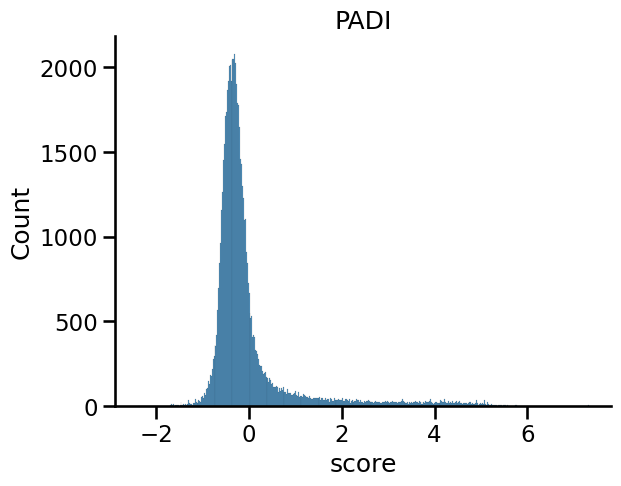

In [714]:
sns.histplot(data = padi, x = "score")
sns.despine()
plt.title("PADI");

## 1B. GCN4

In [715]:
gcn4 = pd.read_csv("../data/Table_S5_Tile_Activities_Properties_Dataframe.csv")
gcn4.columns

Index(['ADseq', 'Name', 'ArrayDNA', 'Activity_BioRepA_BYS4',
       'Activity_BioRepB_BYS4', 'TotalReads_BioRepA_BYS4',
       'TotalReads_BioRepB_BYS4', 'BioRep_A_GFP_TotalReads', 'BioRep_A_GFP',
       'BioRep_B_GFP_TotalReads', 'BioRep_B_GFP',
       'BioRep_A_mCherry_TotalReads', 'BioRep_A_mCherry',
       'BioRep_B_mCherry_TotalReads', 'BioRep_B_mCherry',
       'Activity_BYS4_BioRepAverage', 'Stdev_BYS4_BioReps',
       'Activity_SCglucose', 'Start', 'Recovered', 'Charge',
       'HydrophobicityKD', 'HydrophobicityWW', 'Kappa', 'Omega', 'OmegaWFY_DE',
       'OmegaWFYL_DE', 'OmegaWF_D', 'Disorder', 'A', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y',
       'Aromatics', 'WFYL', 'W..LF', '[WFYL]..[WFYL][WFYL]',
       '[WFL]..[WFL][WFL]', '[DE][WFY]', '[DE][WF]', '[DE][L]', '[DE].[WFY]',
       '[DE]..[WFY]', 'FF', 'F.F', 'F..F', '[FY].....[FY]DF', 'D.F', 'D..F',
       'FD', 'F.D', 'F..D', 'MF.Y..L', 'M..Y..L', 'SP',
       '[

In [716]:
gcn4 = gcn4[["ADseq", "Activity_BYS4_BioRepAverage"]]
gcn4 = gcn4.rename(columns = {"ADseq" : "seq", "Activity_BYS4_BioRepAverage": "score"})
gcn4["seq"] = gcn4["seq"].str.strip().str.upper()
gcn4["screen"] = "gcn4"
gcn4 = gcn4.drop_duplicates(subset = "seq")
gcn4

,seq,score,screen
0,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA,50849.75654,gcn4
1,EVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQ,NaN,gcn4
2,IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG,25911.89042,gcn4
3,ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG,22446.77365,gcn4
4,QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA,51501.39821,gcn4
...,...,...,...
20726,AKVDTEEEDKTMVDSTSLSWEDLFDFESYSTDLIASINPD,261829.75160,gcn4
20727,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,261410.70530,gcn4
20728,MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK,152798.87030,gcn4
20729,STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK,113197.55830,gcn4


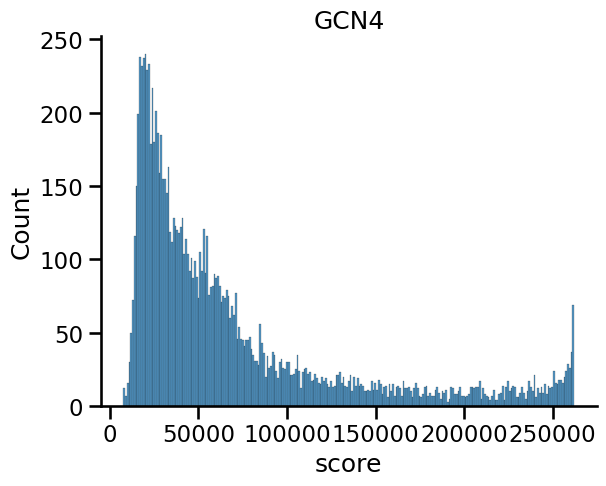

In [717]:
sns.histplot(gcn4["score"], binwidth = 1000)
sns.despine()
plt.title("GCN4");

## 1C. Sog1

In [718]:
sog1_sort3 = pd.read_csv("../data/SK_recalc_scores.csv")
sog1_sort3 = sog1_sort3.rename(columns = {"ProteinSeq" : "seq", "Activity_S3_1" : "score"})
sog1_sort3 = sog1_sort3[["seq", "score"]]
sog1_sort3["seq"] = sog1_sort3["seq"].str.strip().str.upper()
sog1_sort3["screen"] = "sog1_sort3"
sog1_sort3 = sog1_sort3.drop_duplicates(subset = "seq")
sog1_sort3

,seq,score,screen
0,AAAAAAAAAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS,247.596326,sog1_sort3
1,AAAAAAAACQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,2420.236680,sog1_sort3
2,AAAAAAAAGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL,544.103037,sog1_sort3
3,AAAAAAAANIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD,391.240450,sog1_sort3
4,AAAAAHLGPEDFKRDLEECQAAAADPSNIELDTPPEFRLS,428.387407,sog1_sort3
...,...,...,...
6788,YSLFDDPSEGYETDPLFNTNDDLDDSNGWYSLFPPTTTSS,1627.763143,sog1_sort3
6789,YSLFDSPSEGYETDPLFNTNDDLDDSNGWYSLFPPTTTSS,3249.679912,sog1_sort3
6790,YSTGTRKRRKIHDDDFGDVRWHKTGRTKPVVLDGVQRGCK,1304.650547,sog1_sort3
6791,YSTGTRKRRKILDDDLGDVRWHKTGRTKPVILDGVQRGCK,2263.458216,sog1_sort3


In [719]:
sog1_sort2 = pd.read_csv("../data/Sog1_library1_sort2.csv")
sog1_sort2 = sog1_sort2.rename(columns = {"AAseq" : "seq", "Activity_GFP8" : "score"})
sog1_sort2 = sog1_sort2[["seq", "score"]]
sog1_sort2["seq"] = sog1_sort2["seq"].str.strip().str.upper()
sog1_sort2["screen"] = "sog1_sort2"
sog1_sort2 = sog1_sort2.drop_duplicates(subset = "seq")
sog1_sort2

,seq,score,screen
0,EDPTWFDSGSQFILNSQQLVEALSLCDDAAGSQDREENTN,636.156202,sog1_sort2
1,EALSLCDDLLGDQDREENDNDGDLKDKQPCIADYAHLGPE,602.696194,sog1_sort2
2,DLAEDDEVMCMEDEVQSIQPNHERPDDGPELEHGLENGAK,381.502348,sog1_sort2
3,GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK,347.155741,sog1_sort2
4,SELTSTLGISHRLPQSLTPCVKTGSLQSGGLVQSVPFEEL,437.694050,sog1_sort2
...,...,...,...
1107,HFNPHTDYFYTFDEYLLSTPPAIFPDLKLTSQEASEVMRS,4444.689683,sog1_sort2
1108,EDPTWFDSGDQFILNDQQLVEALSLCDDLLGSQDREENTN,7960.852191,sog1_sort2
1109,EDPTWFDSGDQAIANDQQLVEALSLCDDLLGDQDREENTN,2769.615372,sog1_sort2
1110,EDPTADAAIQQLWNQGFLFVESLSLCDDLLGAQDREENTN,5603.789064,sog1_sort2


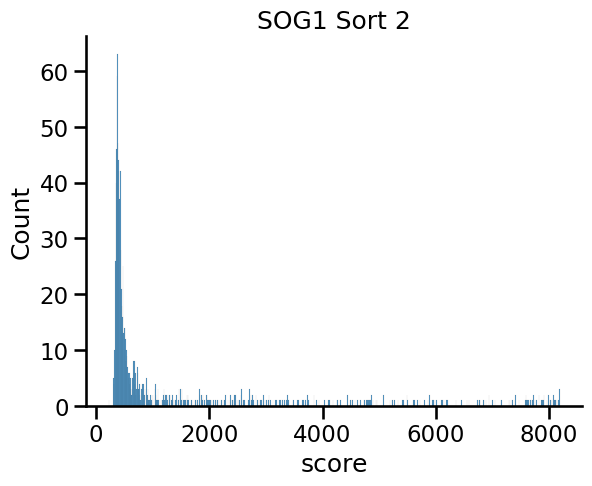

In [720]:
sns.histplot(sog1_sort2["score"], binwidth = 10)
sns.despine()
plt.title("SOG1 Sort 2");

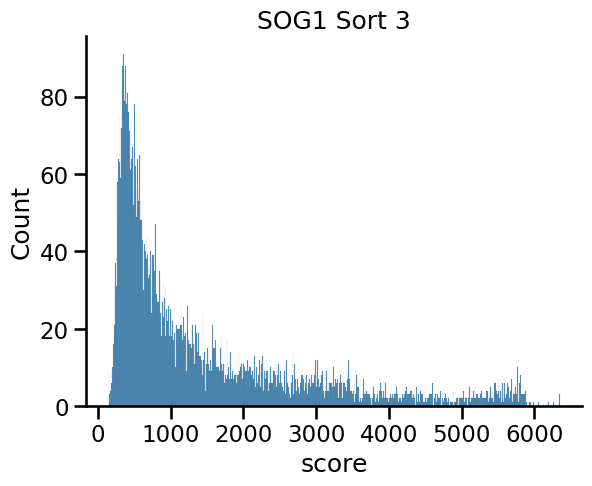

In [721]:
sns.histplot(sog1_sort3["score"], binwidth = 10)
sns.despine()
plt.title("SOG1 Sort 3");

## 1D. Controls library

In [722]:
controls_syn = pd.read_csv("../data/Controls_Library_Sorted_with_SynADs.csv")
controls_syn = controls_syn.rename(columns = {"AAseq" : "seq", "SimpleAverage" : "score"})
controls_syn = controls_syn[["seq", "score"]]
controls_syn["seq"] = controls_syn["seq"].str.strip().str.upper()
controls_syn["screen"] = "controls_syn"
controls_syn = controls_syn.drop_duplicates(subset = "seq")
controls_syn

,seq,score,screen
0,AAEPNYGSVAISLPLERTISSQSMERSGSSSSGSPVVLDG,5639.517210,controls_syn
1,AAIALSQPETIPAKEISVPPSPAVGKSASPAPSPAPSKSG,4815.867766,controls_syn
2,AAIPENELLDEDTMNAISSLKNDLSNISNSLPAEAPHEIA,15854.361910,controls_syn
3,AALDVALALSQPETKPAKEVSVPPSPAIRNSASPAPSPAP,5231.704055,controls_syn
4,AAVVESFFSSSADSTPMFEYENLEDNSKEWTSLFDNDIPV,239156.047600,controls_syn
...,...,...,...
492,YKMQQEQNMKTFDPEVAFEEWFLSTDYQGLPSDFSPLTGV,248346.156300,controls_syn
493,YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL,6427.793208,controls_syn
494,YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA,6050.175447,controls_syn
495,YSLFDSPSEGYETSPLFNTNDDLDDSNGWYSLFPPTTTSS,202363.268900,controls_syn


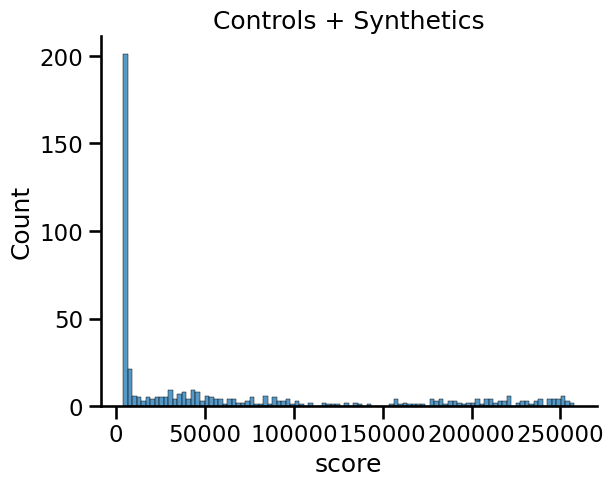

In [723]:
sns.histplot(controls_syn["score"], bins = 100)
sns.despine()
plt.title("Controls + Synthetics");

## 1E. Comparing datasets

,seq,score_x,screen_x,score_y,screen_y
0,GQRKRRKITPTLVNDEPVRWHKTGRTKPVMLSGVQRGCKK,347.155741,sog1_sort2,-0.272920,padi
1,ITYQQQKLGENPDEGESSSGVRGGPTTPKTNTPTPPSLVD,361.932263,sog1_sort2,-0.573854,padi
2,SEPHVLIEEFIRPVTEDVGINYTHPQNLPGANKDGVSVFF,732.096986,sog1_sort2,-0.428033,padi
3,IIWHLLAKSGLSGLSSHPFIDEFIPTVNQDDGICYTHPKN,451.955540,sog1_sort2,-0.205281,padi
4,PSDYVSAHEVSLAETSEVMCMEDEVQSIQPNHERPSSGPE,423.885353,sog1_sort2,-0.790868,padi
...,...,...,...,...,...
106,DLKMFDPFFEELDSIPEAALGKMWSKKARMDEEFVVNLSE,5860.301838,sog1_sort2,2.234280,padi
107,GVKFDPSDPEIIWHLLAKSGLSGLSSHPFIDEFIPTVNQD,1483.665677,sog1_sort2,0.088566,padi
108,DFKRDLEECQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,2709.618735,sog1_sort2,2.009163,padi
109,FEPTDEDIIEFLEAKCGIGGSEPHVLIEEFIRPVTEDVGI,5944.043128,sog1_sort2,4.112089,padi


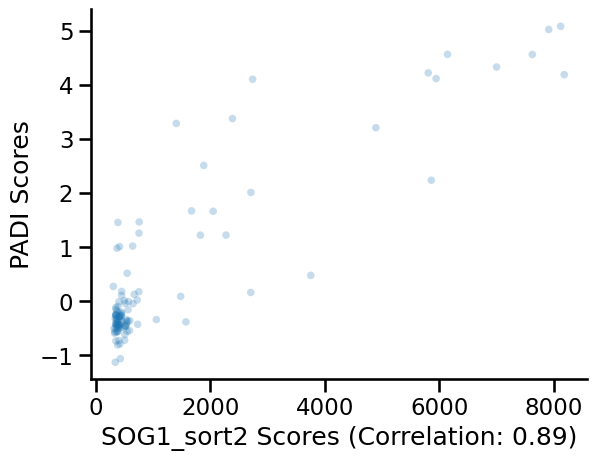

In [724]:
from scipy.stats import pearsonr

# Merge the dataframes on 'seq'
sog1_sort2_padi = pd.merge(sog1_sort2, padi, on="seq")
display(sog1_sort2_padi)

# Scatter plot
sns.scatterplot(data=sog1_sort2_padi, x="score_x", y="score_y", edgecolor = 'none', alpha = 0.25, s = 30)

# Calculate and display correlation
correlation, _ = pearsonr(sog1_sort2_padi.dropna()["score_x"], sog1_sort2_padi.dropna()["score_y"])
plt.xlabel(f"SOG1_sort2 Scores (Correlation: {correlation:.2f})")
plt.ylabel("PADI Scores")
sns.despine()

,seq,score_x,screen_x,score_y,screen_y
0,AESSLVISGDSHSDACDEATTAELVDFKWYPELESLDFTL,5462.453024,sog1_sort3,5.388782,padi
1,AFALCRVVKKNELKKNSKSLKNKNEQDIGSCYSSLATSPC,5456.424281,sog1_sort3,-1.218885,padi
2,AFDDDSKMVLDSYAEGLENIQEASSGSTSDKIAKVGGNVS,378.783165,sog1_sort3,-0.272247,padi
3,AGFWKATGRDKAVYDKSKLIGMRKTLVFYKGRAPNGQKTD,1376.146754,sog1_sort3,-0.362082,padi
4,ANKDGVSVFFFHKTVQAYGTGQRKRRKITPTLVNDEPVRW,355.121535,sog1_sort3,-0.293578,padi
...,...,...,...,...,...
277,YMDRTGSNICMPESQTTTQHQDDVLFMQLPSLETPKSESP,453.343634,sog1_sort3,-0.208688,padi
278,YQNGQRKRRRITPTSLKDDTVRWHKTGQTKPVMLNGIQKG,413.411986,sog1_sort3,-0.334660,padi
279,YRIDNSNVLIPWPGLPKGVKFEPTDEDIIEFLEAKCGIGG,1487.211992,sog1_sort3,1.667505,padi
280,YSTGTRKRRKIHDDDFGDVRWHKTGRTKPVVLDGVQRGCK,1304.650547,sog1_sort3,-0.115669,padi


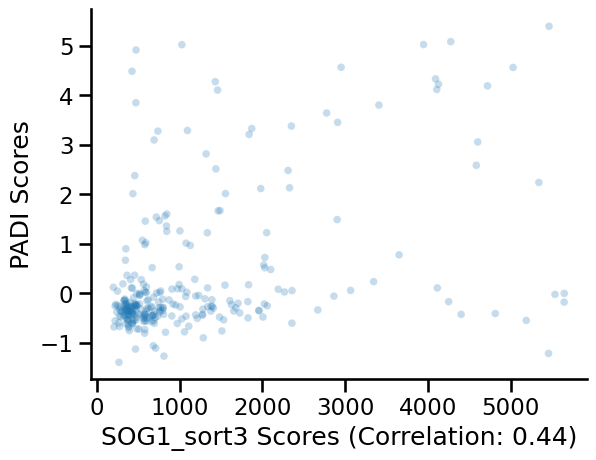

In [725]:
from scipy.stats import pearsonr

# Merge the dataframes on 'seq'
sog1_sort3_padi = pd.merge(sog1_sort3, padi, on="seq")
display(sog1_sort3_padi)

# Scatter plot
sns.scatterplot(data=sog1_sort3_padi, x="score_x", y="score_y", edgecolor = 'none', alpha = 0.25, s = 30)

# Calculate and display correlation
correlation, _ = pearsonr(sog1_sort3_padi.dropna()["score_x"], sog1_sort3_padi.dropna()["score_y"])
plt.xlabel(f"SOG1_sort3 Scores (Correlation: {correlation:.2f})")
plt.ylabel("PADI Scores")
sns.despine()

,seq,score_x,screen_x,score_y,screen_y
0,PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP,427.740464,sog1_sort2,17261.58387,gcn4
1,STDSTPAAEAENAEDNSKEATSAADNDIPVTTDDVSLADK,361.430211,sog1_sort2,18345.73970,gcn4
2,STDSTPMFEYEGLEDNSKEWTSLFDNDIPVTTDDVSPADK,2561.582244,sog1_sort2,64997.04148,gcn4
3,STDSTPMFEYENLENNSKEWTSLFDNDIPVTTDDVSLADK,2623.964475,sog1_sort2,122464.99690,gcn4
4,PPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,2379.148243,sog1_sort2,NaN,gcn4
5,STIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPNNNGF,5071.236824,sog1_sort2,150214.68590,gcn4
6,STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK,3188.980214,sog1_sort2,137982.57010,gcn4
7,STDSTPMFDYDNLEDNSKDWTSLFDNDIPVTTDDVSLADK,4526.084203,sog1_sort2,166175.36020,gcn4
8,PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI,8175.449534,sog1_sort2,260331.73400,gcn4
9,DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,8055.707854,sog1_sort2,258453.39020,gcn4


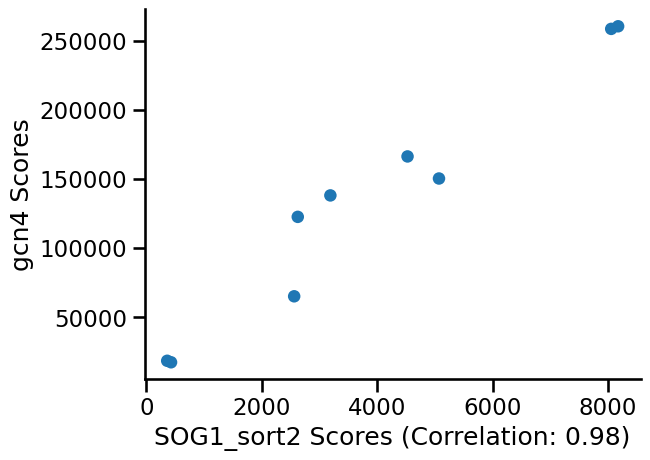

In [726]:
from scipy.stats import pearsonr

# Merge the dataframes on 'seq'
sog1_sort2_gcn4 = pd.merge(sog1_sort2, gcn4, on="seq")
display(sog1_sort2_gcn4)

# Scatter plot
sns.scatterplot(data=sog1_sort2_gcn4, x="score_x", y="score_y", edgecolor = 'none')

# Calculate and display correlation
correlation, _ = pearsonr(sog1_sort2_gcn4.dropna()["score_x"], sog1_sort2_gcn4.dropna()["score_y"])
plt.xlabel(f"SOG1_sort2 Scores (Correlation: {correlation:.2f})")
plt.ylabel("gcn4 Scores")
sns.despine()

,seq,score_x,screen_x,score_y,screen_y
0,AAIPENELLDEDTMNAISSLKNDLSNISNSLPAEAPHEIA,487.823879,sog1_sort3,36628.05513,gcn4
1,AIVDAFFSSSTENTPMFAFEALESNPKNWTPLFDNDIAVT,2248.371935,sog1_sort3,NaN,gcn4
2,AKLTQTRKVKKPNSVVKKSHHVGKDDESRLDHLGVVAYNR,844.190904,sog1_sort3,NaN,gcn4
3,ASSPPPASIATPSPPLAAAQHVPAADGQWLALFPHPSSID,1615.798235,sog1_sort3,55805.36720,gcn4
4,DDAVVESFFSSSTDSTPAAEAENAEDNSKEWTSLFDNDIP,908.475014,sog1_sort3,NaN,gcn4
...,...,...,...,...,...
64,VPESSDPAALKRARNTEAARRSRARKLQRMKQLEDKVEEL,746.463568,sog1_sort3,15084.95417,gcn4
65,VPSNLEVSTTSFLPTPVLEDAKLTQTRKVKKPNSVVKKSH,468.923381,sog1_sort3,NaN,gcn4
66,WGVDDNFDVSPFVGNNNGDLDHALSGDPWYPLFPQEDQAQ,924.994088,sog1_sort3,250406.36590,gcn4
67,YAIPENEAADEDTMNFISSAKNDASNISNSAPFEYPHEIA,300.574719,sog1_sort3,33410.88507,gcn4


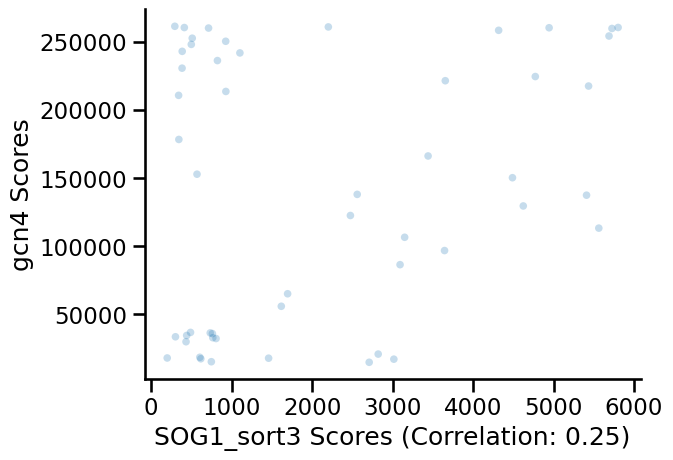

In [727]:
from scipy.stats import pearsonr

# Merge the dataframes on 'seq'
sog1_sort3_gcn4 = pd.merge(sog1_sort3, gcn4, on="seq")
display(sog1_sort3_gcn4)

# Scatter plot
sns.scatterplot(data=sog1_sort3_gcn4, x="score_x", y="score_y", edgecolor = 'none', alpha = 0.25, s = 30)

# Calculate and display correlation
correlation, _ = pearsonr(sog1_sort3_gcn4.dropna()["score_x"], sog1_sort3_gcn4.dropna()["score_y"])
plt.xlabel(f"SOG1_sort3 Scores (Correlation: {correlation:.2f})")
plt.ylabel("gcn4 Scores")
sns.despine()

,seq,score_x,screen_x,score_y,screen_y
0,AAAHVKLDSFPAGVRFDPSDEELLEHLAAKIGRSSRKPHP,458.621875,sog1_sort3,530.709230,sog1_sort2
1,AEDFKKDLEECQRLEPTDNTNLELDNTDEFRLSQIEFSQD,647.499278,sog1_sort3,599.586529,sog1_sort2
2,AEHGAENGAKEMADDKEEQEKDRDNENQGEEDPTAADSGA,538.946766,sog1_sort3,473.473677,sog1_sort2
3,AEHGAENGAKEMADDKEEQEKDRDNENQGEEDPTAADSGD,628.781469,sog1_sort3,362.993031,sog1_sort2
4,AEHGAENGAKEMADDKEEQEKDRDNENQGEEDPTAADSGS,556.118101,sog1_sort3,344.676099,sog1_sort2
...,...,...,...,...,...
1105,YNTGTRKRRRINTDDADVRWHKTGNTKPVLVDGKHLGCKK,754.332497,sog1_sort3,364.855917,sog1_sort2
1106,YPPRDDYHEQPYPVMDTEGNVIGLTDLECDEELLPISWDW,4452.840011,sog1_sort3,8088.228883,sog1_sort2
1107,YQNGQRKRRRITPTSLKDDTVRWHKTGQTKPVMLNGIQKG,413.411986,sog1_sort3,370.504520,sog1_sort2
1108,YRIDNSNVLIPWPGLPKGVKFEPTDEDIIEFLEAKCGIGG,1487.211992,sog1_sort3,1673.063252,sog1_sort2


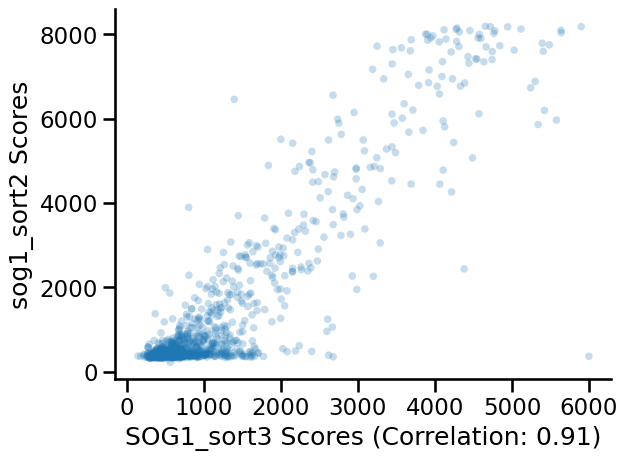

In [728]:
from scipy.stats import pearsonr

# Merge the dataframes on 'seq'
sog1_sort3_sog1_sort2 = pd.merge(sog1_sort3, sog1_sort2, on="seq")
display(sog1_sort3_sog1_sort2)

# Scatter plot
sns.scatterplot(data=sog1_sort3_sog1_sort2, x="score_x", y="score_y", edgecolor = 'none', alpha = 0.25, s = 30)

# Calculate and display correlation
correlation, _ = pearsonr(sog1_sort3_sog1_sort2.dropna()["score_x"], sog1_sort3_sog1_sort2.dropna()["score_y"])
plt.xlabel(f"SOG1_sort3 Scores (Correlation: {correlation:.2f})")
plt.ylabel("sog1_sort2 Scores")
sns.despine()

,seq,score_x,screen_x,score_y,screen_y
0,DDAVVESFFSSSTDSTPMFEYENLEDNSKEWTSLFDNDIP,158106.387700,controls_syn,8055.707854,sog1_sort2
1,PPTDVSAGDEAHADGEDVAMAHADAADDFDADMAGDGDSP,4861.135792,controls_syn,427.740464,sog1_sort2
2,PPTDVSLGDELHLDGEDVAMAHADALDDFDLDMLGDGDSP,15277.058960,controls_syn,2379.148243,sog1_sort2
3,PSPSSSVDNLNDYLTDINSLAWGVNSLNDEFWTDLFMNDI,220767.013200,controls_syn,8175.449534,sog1_sort2
4,STDSTPAAEAENAEDNSKEATSAADNDIPVTTDDVSLADK,4463.296310,controls_syn,361.430211,sog1_sort2
5,STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK,47109.769100,controls_syn,3188.980214,sog1_sort2
6,STIPLDFMPRDALHGFDWSEEDDMSDGLPFLKTDPNNNGF,45422.092000,controls_syn,5071.236824,sog1_sort2


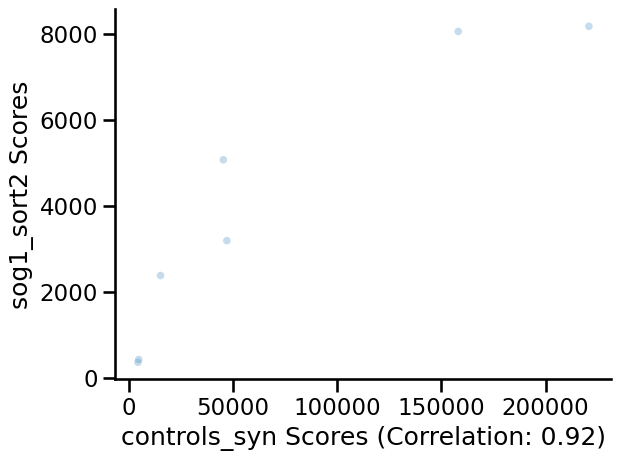

In [729]:
from scipy.stats import pearsonr

# Merge the dataframes on 'seq'
controls_syn_sog1_sort2 = pd.merge(controls_syn, sog1_sort2, on="seq")
display(controls_syn_sog1_sort2)

# Scatter plot
sns.scatterplot(data=controls_syn_sog1_sort2, x="score_x", y="score_y", edgecolor = 'none', alpha = 0.25, s = 30)

# Calculate and display correlation
correlation, _ = pearsonr(controls_syn_sog1_sort2.dropna()["score_x"], controls_syn_sog1_sort2.dropna()["score_y"])
plt.xlabel(f"controls_syn Scores (Correlation: {correlation:.2f})")
plt.ylabel("sog1_sort2 Scores")
sns.despine()

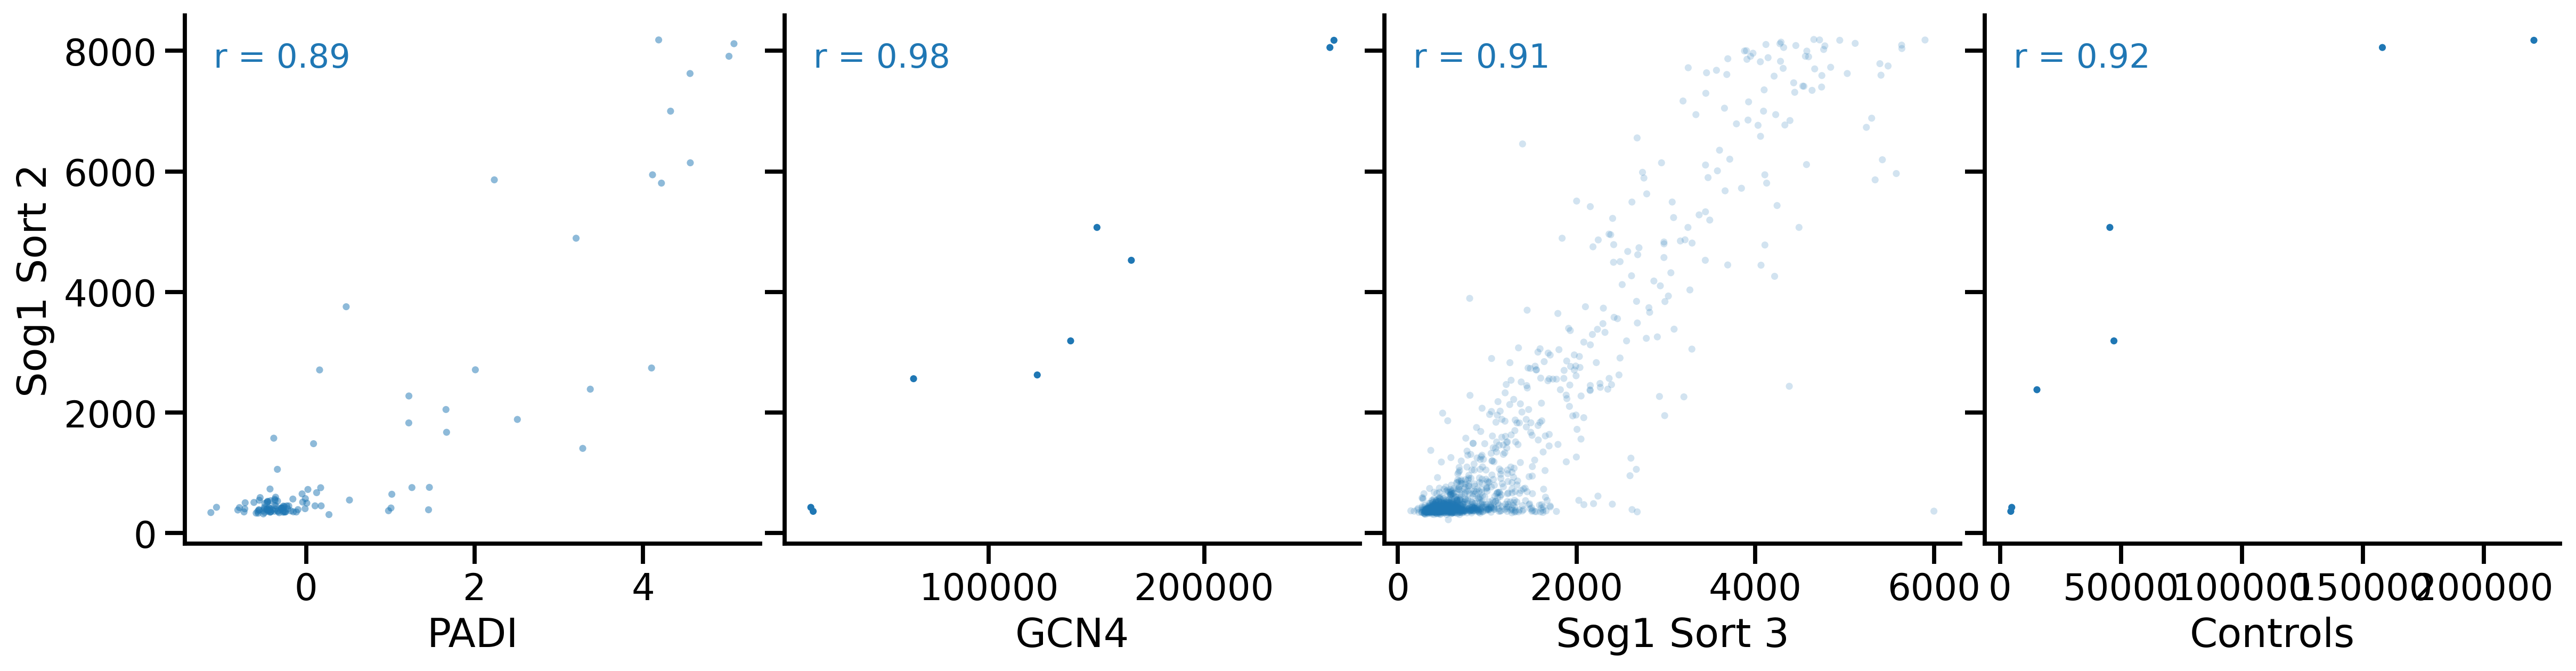

In [730]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Plan: can use Sog1 Sort 2 scores to normalize all libraries!

fig, axs = plt.subplots(1,4 , sharey = True, figsize = (16, 4), dpi = 300)

sns.scatterplot(data=sog1_sort2_padi, y="score_x", x="score_y", edgecolor = 'none', alpha = 0.5, s = 10, ax = axs[0])

axs[0].set_xlabel("PADI")
axs[0].set_ylabel("Sog1 Sort 2")

sns.scatterplot(data=sog1_sort2_gcn4, y="score_x", x="score_y", edgecolor = 'none', alpha = 1, s = 10, ax = axs[1])
axs[1].set_xlabel("GCN4")
    
sns.scatterplot(data = sog1_sort3_sog1_sort2, x="score_x", y="score_y", edgecolor = 'none', alpha = 0.2, s = 10, ax = axs[2])
axs[2].set_xlabel("Sog1 Sort 3")

sns.scatterplot(data = controls_syn_sog1_sort2, x="score_x", y="score_y", edgecolor = 'none', alpha = 1, s = 10, ax = axs[3])
axs[3].set_xlabel("Controls")

# Create copies of the dataframes to avoid mutating the original ones
sog1_sort2_padi_clean = sog1_sort2_padi.dropna()
sog1_sort2_gcn4_clean = sog1_sort2_gcn4.dropna()
sog1_sort3_sog1_sort2_clean = sog1_sort3_sog1_sort2.dropna()
controls_syn_sog1_sort2_clean = controls_syn_sog1_sort2.dropna()
blue_color = sns.color_palette('tab10')[0]

# Add correlations as text on each plot
axs[0].text(0.05, 0.95, f"r = {pearsonr(sog1_sort2_padi_clean['score_x'], sog1_sort2_padi_clean['score_y'])[0]:.2f}", 
            transform=axs[0].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

axs[1].text(0.05, 0.95, f"r = {pearsonr(sog1_sort2_gcn4_clean['score_x'], sog1_sort2_gcn4_clean['score_y'])[0]:.2f}", 
            transform=axs[1].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

axs[2].text(0.05, 0.95, f"r = {pearsonr(sog1_sort3_sog1_sort2_clean['score_x'], sog1_sort3_sog1_sort2_clean['score_y'])[0]:.2f}", 
            transform=axs[2].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

axs[3].text(0.05, 0.95, f"r = {pearsonr(controls_syn_sog1_sort2_clean['score_x'], controls_syn_sog1_sort2_clean['score_y'])[0]:.2f}", 
            transform=axs[3].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

datasets = [
    ("PADI", sog1_sort2_padi_clean),
    ("GCN4", sog1_sort2_gcn4_clean),
    ("SOG1 Sort 3", sog1_sort3_sog1_sort2_clean),
    ("Controls", controls_syn_sog1_sort2_clean)
]


sns.despine()
plt.tight_layout(pad = 0)



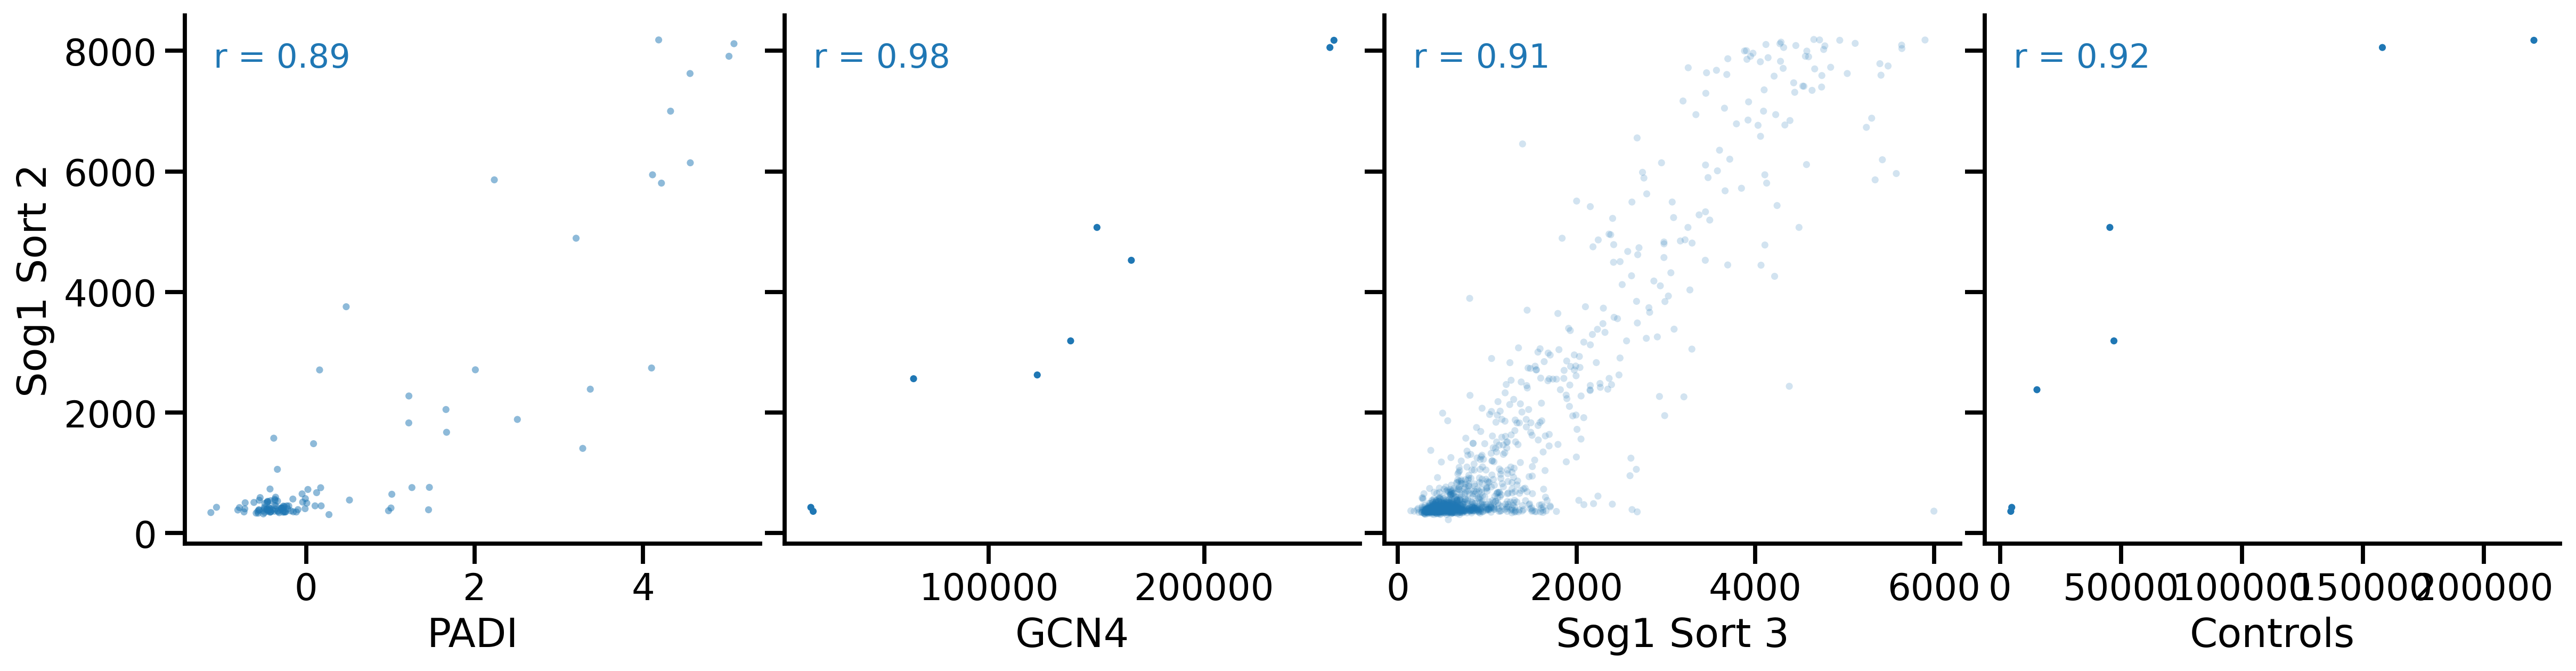

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Plan: can use Sog1 Sort 2 scores to normalize all libraries!

fig, axs = plt.subplots(1,4 , sharey = True, figsize = (16, 4), dpi = 300)

sns.scatterplot(data=sog1_sort2_padi, y="score_x", x="score_y", edgecolor = 'none', alpha = 0.5, s = 10, ax = axs[0])
fit_linear_reg(sog1_sort2_padi, y="score_x", x="score_y", ax = axs[0])

axs[0].set_xlabel("PADI")
axs[0].set_ylabel("Sog1 Sort 2")

sns.scatterplot(data=sog1_sort2_gcn4, y="score_x", x="score_y", edgecolor = 'none', alpha = 1, s = 10, ax = axs[1])
fit_linear_reg(sog1_sort2_gcn4, y="score_x", x="score_y", ax = axs[1])
axs[1].set_xlabel("GCN4")
    
sns.scatterplot(data = sog1_sort3_sog1_sort2, x="score_x", y="score_y", edgecolor = 'none', alpha = 0.2, s = 10, ax = axs[2])
fit_linear_reg(sog1_sort3_sog1_sort2, x="score_x", y="score_y", ax = axs[2])
axs[2].set_xlabel("Sog1 Sort 3")

sns.scatterplot(data = controls_syn_sog1_sort2, x="score_x", y="score_y", edgecolor = 'none', alpha = 1, s = 10, ax = axs[3])
fit_linear_reg(controls_syn_sog1_sort2, x="score_x", y="score_y", ax = axs[3])
axs[3].set_xlabel("Controls")

# Create copies of the dataframes to avoid mutating the original ones
sog1_sort2_padi_clean = sog1_sort2_padi.dropna()
sog1_sort2_gcn4_clean = sog1_sort2_gcn4.dropna()
sog1_sort3_sog1_sort2_clean = sog1_sort3_sog1_sort2.dropna()
controls_syn_sog1_sort2_clean = controls_syn_sog1_sort2.dropna()
blue_color = sns.color_palette('tab10')[0]

# Add correlations as text on each plot
axs[0].text(0.05, 0.95, f"r = {pearsonr(sog1_sort2_padi_clean['score_x'], sog1_sort2_padi_clean['score_y'])[0]:.2f}", 
            transform=axs[0].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

axs[1].text(0.05, 0.95, f"r = {pearsonr(sog1_sort2_gcn4_clean['score_x'], sog1_sort2_gcn4_clean['score_y'])[0]:.2f}", 
            transform=axs[1].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

axs[2].text(0.05, 0.95, f"r = {pearsonr(sog1_sort3_sog1_sort2_clean['score_x'], sog1_sort3_sog1_sort2_clean['score_y'])[0]:.2f}", 
            transform=axs[2].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

axs[3].text(0.05, 0.95, f"r = {pearsonr(controls_syn_sog1_sort2_clean['score_x'], controls_syn_sog1_sort2_clean['score_y'])[0]:.2f}", 
            transform=axs[3].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

datasets = [
    ("PADI", sog1_sort2_padi_clean),
    ("GCN4", sog1_sort2_gcn4_clean),
    ("SOG1 Sort 3", sog1_sort3_sog1_sort2_clean),
    ("Controls", controls_syn_sog1_sort2_clean)
]


sns.despine()
plt.tight_layout(pad = 0)



In [737]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def fit_linear_reg(df, x, y):
    # Clean the dataframe by dropping NaN values
    df_cleaned = df.dropna()

    X = df_cleaned[[x]]  # Independent variable(s)
    y = df_cleaned[y]    # Dependent variable

    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit linear regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    r2 = r2_score(y_test, y_pred)

    return model, r2

def plot_linear_reg(df, x, y, ax):
    # Fit the linear regression model
    model, r2 = fit_linear_reg(df=df, x=x, y=y)
    
    # Add R^2 and equation to the plot
    ax.text(0.95, 0.05, f"R^2 = {r2:.2f}\ny = {model.intercept_:.2f} + {model.coef_[0]:.2f}x", 
            transform=ax.transAxes, fontsize='small', verticalalignment='bottom', 
            color=sns.color_palette('colorblind')[1], ha='right')

    # Create linspace for smooth regression line
    x_min, x_max = df[x].min(), df[x].max()
    x_range = np.linspace(x_min, x_max, 100).reshape(-1, 1)  # 100 points evenly spaced
    y_fit = model.predict(x_range)

    # Plot the regression line
    ax.plot(x_range, y_fit, color=sns.color_palette('colorblind')[1], lw=3, alpha=0.5)


In [738]:
# # Run fit_linear_reg on each cleaned dataset
# fit_linear_reg(sog1_sort2_padi_clean)
# fit_linear_reg(sog1_sort2_gcn4_clean)
# fit_linear_reg(sog1_sort3_sog1_sort2_clean)
# fit_linear_reg(controls_syn_sog1_sort2_clean)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


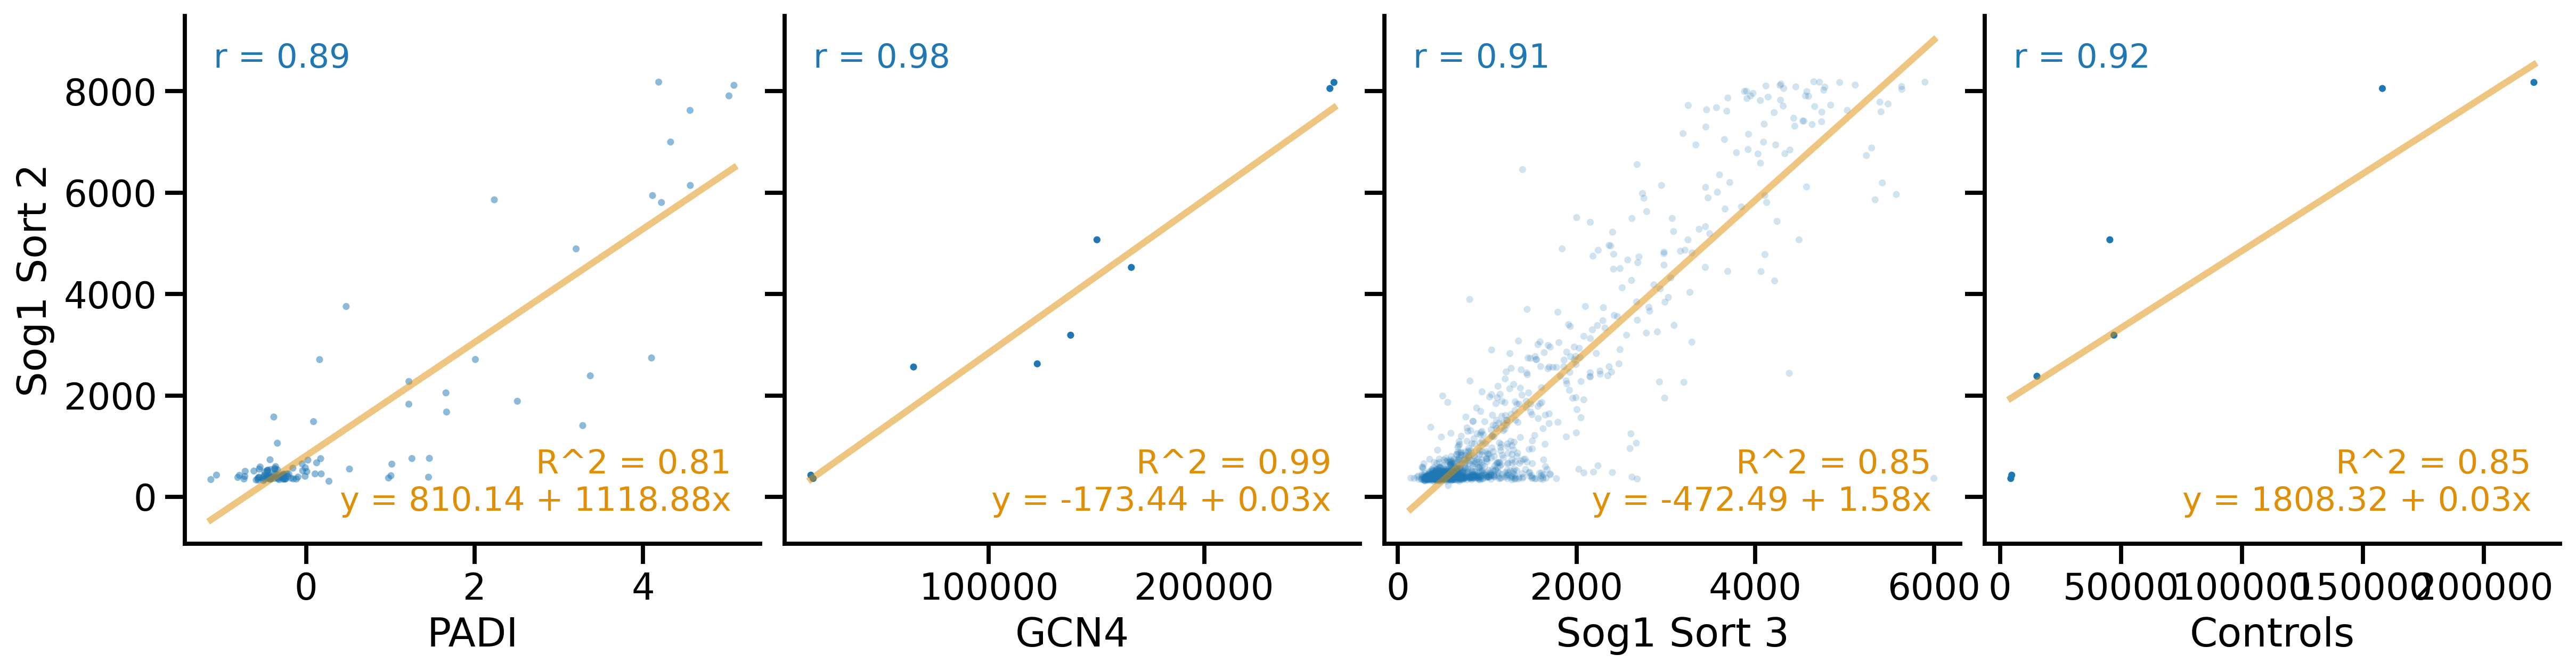

In [745]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Plan: can use Sog1 Sort 2 scores to normalize all libraries!

fig, axs = plt.subplots(1,4 , sharey = True, figsize = (16, 4), dpi = 300)

sns.scatterplot(data=sog1_sort2_padi, y="score_x", x="score_y", edgecolor = 'none', alpha = 0.5, s = 10, ax = axs[0])
plot_linear_reg(sog1_sort2_padi, y="score_x", x="score_y", ax = axs[0])
#axs[0].axvline(1, color=sns.color_palette('colorblind')[1], alpha = 0.25)
#axs[0].axhline(padi_threshold, color=sns.color_palette('colorblind')[1], alpha = 0.25)
axs[0].set_xlabel("PADI")
axs[0].set_ylabel("Sog1 Sort 2")

sns.scatterplot(data=sog1_sort2_gcn4, y="score_x", x="score_y", edgecolor = 'none', alpha = 1, s = 10, ax = axs[1])
plot_linear_reg(sog1_sort2_gcn4, y="score_x", x="score_y", ax = axs[1])
#axs[1].axvline(94031, color=sns.color_palette('colorblind')[1], alpha = 0.25)
#axs[1].axhline(gcn4_threshold, color=sns.color_palette('colorblind')[1], alpha = 0.25)
axs[1].set_xlabel("GCN4")
    
sns.scatterplot(data = sog1_sort3_sog1_sort2, x="score_x", y="score_y", edgecolor = 'none', alpha = 0.2, s = 10, ax = axs[2])
plot_linear_reg(sog1_sort3_sog1_sort2, x="score_x", y="score_y", ax = axs[2])
#axs[2].axvline(1500, color=sns.color_palette('colorblind')[1], alpha = 0.25)
#axs[2].axhline(sog1_sort3_threshold, color=sns.color_palette('colorblind')[1], alpha = 0.25)
axs[2].set_xlabel("Sog1 Sort 3")

sns.scatterplot(data = controls_syn_sog1_sort2, x="score_x", y="score_y", edgecolor = 'none', alpha = 1, s = 10, ax = axs[3])
plot_linear_reg(controls_syn_sog1_sort2, x="score_x", y="score_y", ax = axs[3])
axs[3].set_xlabel("Controls")
#axs[3].axvline(19530, color=sns.color_palette('colorblind')[1], alpha = 0.25)
#axs[3].axhline(controls_syn_threshold, color=sns.color_palette('colorblind')[1], alpha = 0.25)


# Create copies of the dataframes to avoid mutating the original ones
sog1_sort2_padi_clean = sog1_sort2_padi.dropna()
sog1_sort2_gcn4_clean = sog1_sort2_gcn4.dropna()
sog1_sort3_sog1_sort2_clean = sog1_sort3_sog1_sort2.dropna()
controls_syn_sog1_sort2_clean = controls_syn_sog1_sort2.dropna()
blue_color = sns.color_palette('tab10')[0]

# Add correlations as text on each plot
axs[0].text(0.05, 0.95, f"r = {pearsonr(sog1_sort2_padi_clean['score_x'], sog1_sort2_padi_clean['score_y'])[0]:.2f}", 
            transform=axs[0].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

axs[1].text(0.05, 0.95, f"r = {pearsonr(sog1_sort2_gcn4_clean['score_x'], sog1_sort2_gcn4_clean['score_y'])[0]:.2f}", 
            transform=axs[1].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

axs[2].text(0.05, 0.95, f"r = {pearsonr(sog1_sort3_sog1_sort2_clean['score_x'], sog1_sort3_sog1_sort2_clean['score_y'])[0]:.2f}", 
            transform=axs[2].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

axs[3].text(0.05, 0.95, f"r = {pearsonr(controls_syn_sog1_sort2_clean['score_x'], controls_syn_sog1_sort2_clean['score_y'])[0]:.2f}", 
            transform=axs[3].transAxes, fontsize='small', verticalalignment='top', color=blue_color)

datasets = [
    ("PADI", sog1_sort2_padi_clean),
    ("GCN4", sog1_sort2_gcn4_clean),
    ("SOG1 Sort 3", sog1_sort3_sog1_sort2_clean),
    ("Controls", controls_syn_sog1_sort2_clean)
]


sns.despine()
plt.tight_layout(pad = 0)

# for ax in axs:
#     ax.set_yscale('log')
#     ax.set_ylim(100, None)
#     #ax.axhline(2000, color = 'gray', alpha = 0.25)

# 2. Converting 40-mers to Sog1 scores

In [ ]:
# PADI
model, r2 = fit_linear_reg(sog1_sort2_padi, y="score_x", x="score_y")
padi = padi.dropna()
padi["sog1_sort2_transform"] = model.predict(padi[["score"]].rename(columns = {"score" : "score_y"}))
padi_threshold = model.predict([[1]])[0]
print("New threshold:", padi_threshold)
padi

New threshold: 1929.020425499094


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,seq,score,screen,sog1_sort2_transform
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi,1934.277648
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi,1454.476731
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi,474.020001
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi,928.038624
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi,623.122244
...,...,...,...,...
69568,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,-0.139281,padi,654.300636
69569,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,-0.064551,padi,737.914692
69570,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,-0.410777,padi,350.529713
69571,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,0.329820,padi,1179.168684


In [500]:
# GCN4
model, r2 = fit_linear_reg(sog1_sort2_gcn4, y="score_x", x="score_y")
gcn4 = gcn4.dropna()
gcn4["sog1_sort2_transform"] = model.predict(gcn4[["score"]].rename(columns = {"score" : "score_y"}))
gcn4_threshold = model.predict([[94031]])[0]
print("New threshold:", gcn4_threshold)
gcn4

New threshold: 2567.4962443986715


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,seq,score,screen,sog1_sort2_transform
0,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQA,50849.75654,gcn4,1271.235909
2,IESSTASTALQRQDLRYTFRSNARAASGQANANYQAFTAG,25911.89042,gcn4,522.624612
3,ASTALQRQDLRYTFRSNARAASGQANANYQAFTAGSALNG,22446.77365,gcn4,418.605064
4,QRQDLRYTFRSNARAASGQANANYQAFTAGSALNGPSLPA,51501.39821,gcn4,1290.797580
5,RYTFRSNARAASGQANANYQAFTAGSALNGPSLPAPSLFA,59129.19935,gcn4,1519.776999
...,...,...,...,...
20726,AKVDTEEEDKTMVDSTSLSWEDLFDFESYSTDLIASINPD,261829.75160,gcn4,7604.657024
20727,STDYTPMFEYETYEDNFKEWTSLFDNDIPVTTDDVSLADR,261410.70530,gcn4,7592.077648
20728,MTDSTPMFEYELTENNSKEWTSLFDTDIPVTTDDESLADK,152798.87030,gcn4,4331.652465
20729,STDSTPMFEYQNLENNSKEWTSLFDNDIPVTTDNVSLADK,113197.55830,gcn4,3142.858307


In [529]:
# Sog1 sort 3
model, r2 = fit_linear_reg(sog1_sort3_sog1_sort2_clean , x="score_x", y="score_y")
sog1_sort3 = sog1_sort3.dropna()
sog1_sort3["sog1_sort2_transform"] = model.predict(sog1_sort3[["score"]].rename(columns = {"score" : "score_x"}))
sog1_sort3_threshold = model.predict([[1500]])[0]
print("New threshold:", sog1_sort3_threshold)
sog1_sort3

New threshold: 1899.7138281576417


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,seq,score,screen,sog1_sort2_transform
0,AAAAAAAAAKEMLDDKEEQEKDRDNENQGEEDPTWFDSGS,247.596326,sog1_sort3,-80.926591
1,AAAAAAAACQKIVLDPSNIELDTPPEFRLSQLEFGSQDSF,2420.236680,sog1_sort3,3355.041693
2,AAAAAAAAGEEDPTWFDSGSQFILNSQQLVEALSLCDDLL,544.103037,sog1_sort3,387.990251
3,AAAAAAAANIELDTPPEFRLSQLEFGSQDSFLAWGTGKTD,391.240450,sog1_sort3,146.242464
4,AAAAAHLGPEDFKRDLEECQAAAADPSNIELDTPPEFRLS,428.387407,sog1_sort3,204.989308
...,...,...,...,...
6788,YSLFDDPSEGYETDPLFNTNDDLDDSNGWYSLFPPTTTSS,1627.763143,sog1_sort3,2101.767567
6789,YSLFDSPSEGYETDPLFNTNDDLDDSNGWYSLFPPTTTSS,3249.679912,sog1_sort3,4666.782326
6790,YSTGTRKRRKIHDDDFGDVRWHKTGRTKPVVLDGVQRGCK,1304.650547,sog1_sort3,1590.774282
6791,YSTGTRKRRKILDDDLGDVRWHKTGRTKPVILDGVQRGCK,2263.458216,sog1_sort3,3107.101057


In [530]:
# Controls + synthetics
model, r2 = fit_linear_reg(controls_syn_sog1_sort2_clean , x="score_x", y="score_y")
controls_syn = controls_syn.dropna()
controls_syn["sog1_sort2_transform"] = model.predict(controls_syn[["score"]].rename(columns = {"score" : "score_x"}))
controls_syn_threshold = model.predict([[19530]])[0]
print("New threshold:", controls_syn_threshold)
controls_syn

New threshold: 2402.6332739280706


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,seq,score,screen,sog1_sort2_transform
0,AAEPNYGSVAISLPLERTISSQSMERSGSSSSGSPVVLDG,5639.517210,controls_syn,1979.935001
1,AAIALSQPETIPAKEISVPPSPAVGKSASPAPSPAPSKSG,4815.867766,controls_syn,1954.870703
2,AAIPENELLDEDTMNAISSLKNDLSNISNSLPAEAPHEIA,15854.361910,controls_syn,2290.780727
3,AALDVALALSQPETKPAKEVSVPPSPAIRNSASPAPSPAP,5231.704055,controls_syn,1967.524927
4,AAVVESFFSSSADSTPMFEYENLEDNSKEWTSLFDNDIPV,239156.047600,controls_syn,9086.025954
...,...,...,...,...
492,YKMQQEQNMKTFDPEVAFEEWFLSTDYQGLPSDFSPLTGV,248346.156300,controls_syn,9365.688161
493,YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL,6427.793208,controls_syn,2003.922857
494,YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA,6050.175447,controls_syn,1992.431653
495,YSLFDSPSEGYETSPLFNTNDDLDDSNGWYSLFPPTTTSS,202363.268900,controls_syn,7966.392875


In [531]:
combined = pd.concat([padi, gcn4, sog1_sort3, controls_syn])
combined

,seq,score,screen,sog1_sort2_transform
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi,1934.277648
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi,1454.476731
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi,474.020001
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi,928.038624
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi,623.122244
...,...,...,...,...
492,YKMQQEQNMKTFDPEVAFEEWFLSTDYQGLPSDFSPLTGV,248346.156300,controls_syn,9365.688161
493,YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL,6427.793208,controls_syn,2003.922857
494,YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA,6050.175447,controls_syn,1992.431653
495,YSLFDSPSEGYETSPLFNTNDDLDDSNGWYSLFPPTTTSS,202363.268900,controls_syn,7966.392875


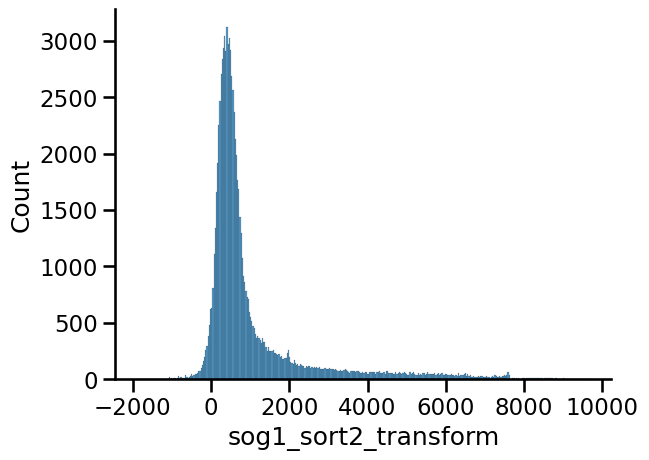

In [532]:
sns.histplot(combined["sog1_sort2_transform"])
sns.despine()

In [533]:
combined[combined["sog1_sort2_transform"] < 0]["screen"].value_counts()

screen
padi          2739
sog1_sort3     429
gcn4            11
Name: count, dtype: int64

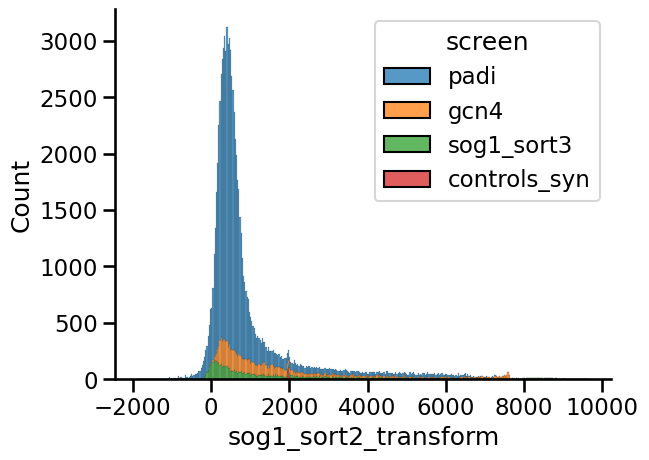

In [534]:
sns.histplot(data=combined, x="sog1_sort2_transform", hue="screen", multiple="stack")
sns.despine()

In [535]:
combined["screen"].value_counts()

screen
padi            68681
gcn4            10855
sog1_sort3       6793
controls_syn      497
Name: count, dtype: int64

In [536]:
combined

,seq,score,screen,sog1_sort2_transform
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi,1934.277648
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi,1454.476731
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi,474.020001
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi,928.038624
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi,623.122244
...,...,...,...,...
492,YKMQQEQNMKTFDPEVAFEEWFLSTDYQGLPSDFSPLTGV,248346.156300,controls_syn,9365.688161
493,YPSTPHPQPRLRVPVKATHRPSALQPFLAQNNPRRHSFNL,6427.793208,controls_syn,2003.922857
494,YRSQSVSTQRRSATSGVRKRQPLPPIVVEDPSDTVAMKRA,6050.175447,controls_syn,1992.431653
495,YSLFDSPSEGYETSPLFNTNDDLDDSNGWYSLFPPTTTSS,202363.268900,controls_syn,7966.392875


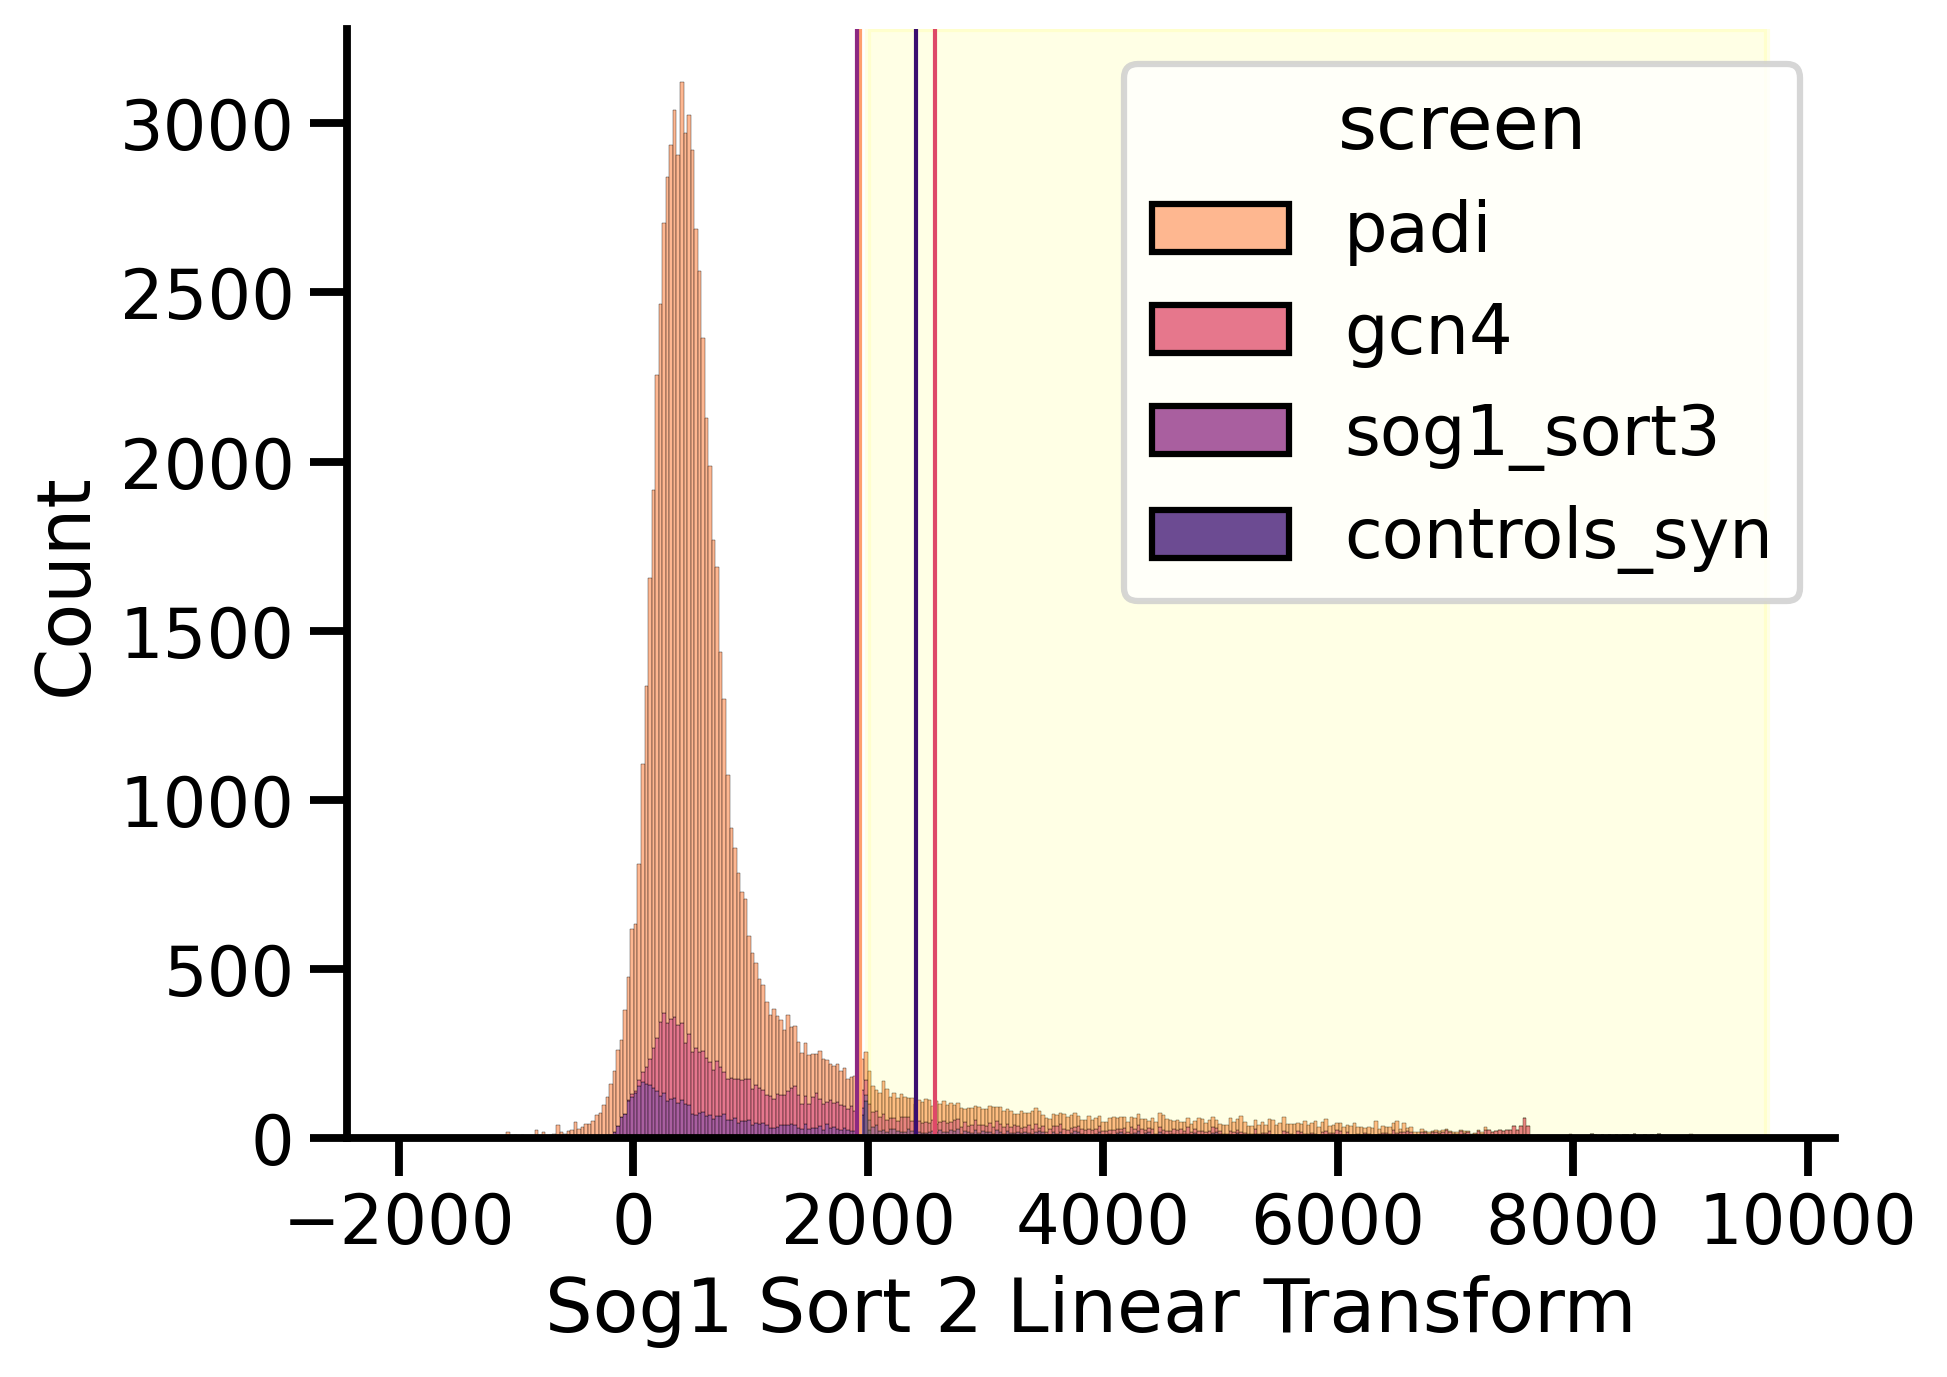

In [560]:
plt.figure(dpi = 300)
palette = sns.color_palette('magma_r', 4)
sns.histplot(data=combined, x="sog1_sort2_transform", hue="screen", multiple="stack", palette = palette)
plt.xlabel("Sog1 Sort 2 Linear Transform")
plt.axvline(padi_threshold, color = palette[0], lw = 1)
plt.axvline(gcn4_threshold, color = palette[1], lw = 1)
plt.axvline(sog1_sort3_threshold, color = palette[2], lw = 1)
plt.axvline(controls_syn_threshold, color = palette[3], lw = 1)

plt.axvspan(2000, combined["sog1_sort2_transform"].max(), color='yellow', alpha=0.1)

sns.despine()

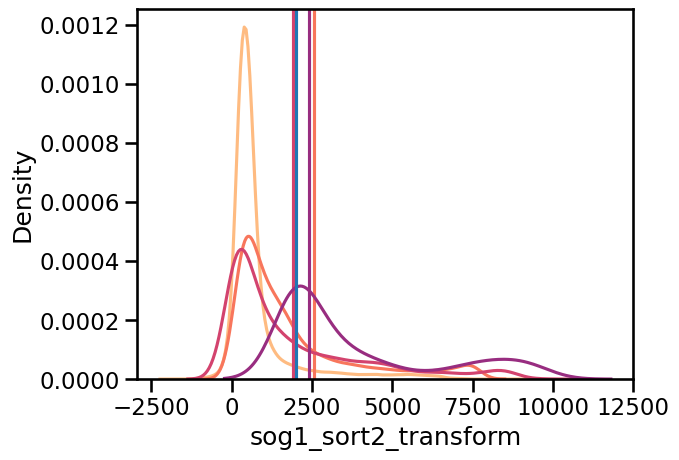

In [509]:
palette = sns.color_palette('magma_r')

sns.kdeplot(padi["sog1_sort2_transform"], color=palette[0])
plt.axvline(padi_threshold, color = palette[0])

sns.kdeplot(gcn4["sog1_sort2_transform"], color=palette[1])
plt.axvline(gcn4_threshold, color = palette[1])

sns.kdeplot(sog1_sort3["sog1_sort2_transform"], color=palette[2])
plt.axvline(sog1_sort3_threshold, color = palette[2])

sns.kdeplot(controls_syn["sog1_sort2_transform"], color=palette[3])
plt.axvline(controls_syn_threshold, color = palette[3])

plt.axvline(2000)

In [438]:
padi

,seq,score,screen,sog1_sort2_transform
0,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEV,1.004699,padi,1934.277648
1,PNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYDPWNL,0.575876,padi,1454.476731
2,LRNKIEGNTSRDVEVAISEVNICSYDPWNLRFQSKYKSRD,-0.300407,padi,474.020001
3,RDVEVAISEVNICSYDPWNLRFQSKYKSRDAMWYFFSRRE,0.105372,padi,928.038624
4,NICSYDPWNLRFQSKYKSRDAMWYFFSRRENNKGNRQSRT,-0.167147,padi,623.122244
...,...,...,...,...
69568,SDFVVKAEDVEASMAIFWTPGTRVKMAMETEDSSRITWFQ,-0.139281,padi,654.300636
69569,EASMAIFWTPGTRVKMAMETEDSSRITWFQGIVFYTYQET,-0.064551,padi,737.914692
69570,GTRVKMAMETEDSSRITWFQGIVFYTYQETGPWRGSPWNS,-0.410777,padi,350.529713
69571,EDSSRITWFQGIVFYTYQETGPWRGSPWNSFRYKIPFTIP,0.329820,padi,1179.168684


In [593]:
test = pd.merge(gcn4, controls_syn, on = "seq", suffixes = ("_gcn4", "_control")).dropna()
test

,seq,score_gcn4,screen_gcn4,sog1_sort2_transform_gcn4,score_control,screen_control,sog1_sort2_transform_control
0,ASGQANANYQAFTAGSALNGPSLPAPSLFAGHGPEAHSDH,31637.98609,gcn4,694.516621,8930.519463,controls_syn,2080.082778
1,NANYQAFTAGSALNGPSLPAPSLFAGHGPEAHSDHSAQRG,35182.01274,gcn4,800.904969,8217.768578,controls_syn,2058.393210
2,NIAATGPAIAPSQAPAIGGPSALGQYGPNPFVPAAYHYPA,42551.71009,gcn4,1022.136356,13961.152720,controls_syn,2233.168889
3,DALSSSSLPSTAVAQGDIQTTSTADTETKNPAQSDIAEAA,13333.59766,gcn4,145.036088,4885.459740,controls_syn,1956.988442
4,SSLPSTAVAQGDIQTTSTADTETKNPAQSDIAEAARQLLE,14917.38884,gcn4,192.580010,4059.300298,controls_syn,1931.847762
...,...,...,...,...,...,...,...
473,PPTDVSAGDEAHADGEDVAMAHADAADDADADMAGDGDSP,14676.81276,gcn4,185.358142,6539.294161,controls_syn,2007.315919
474,TDFIDEEVLMSLVIEMGLDRIKELPELWLGQNEFDFMTDF,262003.24940,gcn4,7609.865265,249619.965400,controls_syn,9404.451170
475,DVTPASPMIRTTSSRATSPSARSVTKPSHVAGVNARQRKP,17838.34122,gcn4,280.264255,4681.870641,controls_syn,1950.793066
476,LTALTSPSLFDGSPDFDTFDISPNFGHSDLENPDTWFSLF,260539.37200,gcn4,7565.921041,246011.216300,controls_syn,9294.634108


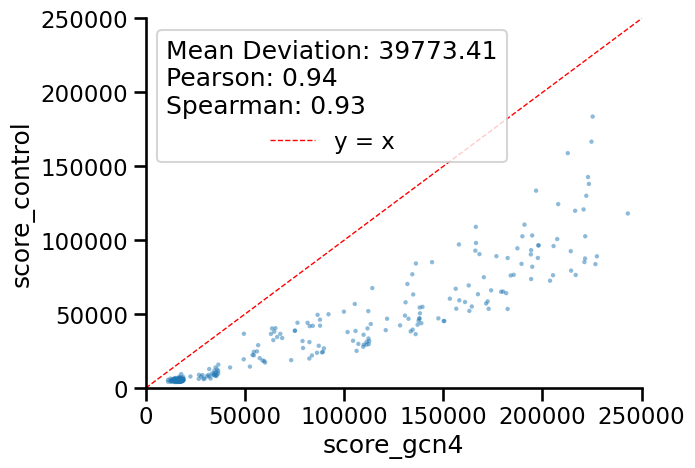

In [706]:
ax = sns.scatterplot(data=test, x="score_gcn4", y="score_control", s = 10, edgecolor = "none", alpha = 0.5)
plt.xlim(0, 250000)
plt.ylim(0, 250000)
plt.plot([0, 250000], [0, 250000], color='red', linestyle='--', linewidth=1, label='y = x')

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(test["score_gcn4"], test["score_control"])

# Calculate Pearson correlation
correlation, _ = pearsonr(test["score_gcn4"], test["score_control"])
# Calculate deviation from y = x line
test['deviation'] = abs(test["score_gcn4"] - test["score_control"])
mean_deviation = test['deviation'].mean()
# Update legend to include both correlations
plt.legend(title=f"Mean Deviation: {mean_deviation:.2f}\nPearson: {correlation:.2f}\nSpearman: {spearman_corr:.2f}")
sns.despine()

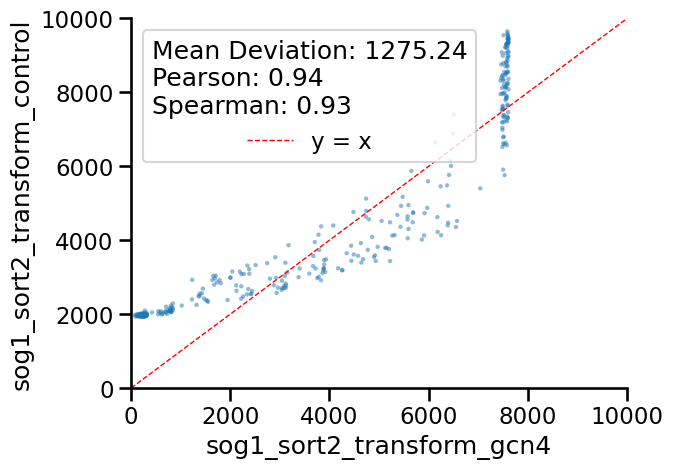

In [705]:
from scipy.stats import spearmanr

# Scatter plot
ax = sns.scatterplot(data=test, x="sog1_sort2_transform_gcn4", y="sog1_sort2_transform_control", s=10, alpha=0.5, edgecolor='none')
plt.xlim(0, 10000)
plt.ylim(0, 10000)
plt.plot([0, 10000], [0, 10000], color='red', linestyle='--', linewidth=1, label='y = x')

# Calculate deviation from y = x line
test['deviation'] = abs(test["sog1_sort2_transform_gcn4"] - test["sog1_sort2_transform_control"])
mean_deviation = test['deviation'].mean()

# Add mean deviation to the legend
plt.legend(title=f"Mean Deviation: {mean_deviation:.2f}\nPearson: {correlation:.2f}\nSpearman: {spearman_corr:.2f}")

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(test["sog1_sort2_transform_gcn4"], test["sog1_sort2_transform_control"])

# Calculate Pearson correlation
correlation, _ = pearsonr(test["sog1_sort2_transform_gcn4"], test["sog1_sort2_transform_control"])

sns.despine()
